# Importación de librerías

In [3]:
import pandas as pd  # Manejo de datos en formato tabular
import matplotlib.pyplot as plt  # Visualización de gráficos
import seaborn as sns  # Visualización de datos con estilos mejorados
import numpy as np  # Operaciones con arrays y matemáticas
import pywt  # Transformada Wavelet

# Librerías de Keras para construir y entrenar modelos de redes neuronales
from keras.models import Model  # Clase base para definir modelos en Keras
from keras.optimizers import Adam  # Optimizador Adam para el ajuste de pesos durante el entrenamiento
from keras import layers  # Módulo para crear capas de redes neuronales
from keras import losses  # Módulo que contiene funciones de pérdida predefinidas
from keras.losses import binary_crossentropy  # Función de pérdida para tareas de clasificación binaria
from keras.utils import pad_sequences  # Para ajustar secuencias de entrada a una longitud específica
from keras.losses import mean_squared_error  # Función de pérdida basada en el error cuadrático medio
from keras.callbacks import ModelCheckpoint  # Para guardar el modelo durante el entrenamiento
from keras.callbacks import LearningRateScheduler  # Para ajustar la tasa de aprendizaje
from keras.callbacks import Callback  # Definición de callbacks personalizados para monitorear métricas o ejecutar acciones específicas durante el entrenamiento
from keras import ops  # Operaciones matemáticas y de tensor utilizadas en el backend de Keras

# Colores personalizados para gráficos
from matplotlib.colors import LinearSegmentedColormap  # Para definir mapas de colores personalizados

# TensorFlow para operaciones y funciones de aprendizaje profundo
import tensorflow as tf  # Framework principal para desarrollo y ejecución de modelos de aprendizaje profundo

# Herramientas de sklearn para evaluación y preprocesamiento de datos
from sklearn.model_selection import train_test_split  # División de datos en entrenamiento y prueba
from sklearn.metrics import confusion_matrix  # Matriz de confusión para evaluar resultados
from sklearn.metrics import accuracy_score  # Métrica de exactitud

import utilities  # Módulo personalizado con utilidades específicas del proyecto

ModuleNotFoundError: No module named 'pywt'

# Generador

## Cargar datos de entrenamiento del generador

In [4]:
limit_len = 1500  # Longitud límite de las secuencias utilizadas para el entrenamiento de las redes
DATA = '../data/raw_binary/emothaw_data.pkl'  # Ruta del archivo con los datos de las señales de la base de datos
with open(DATA, 'rb') as f:  # Leer archivo con los datos
    data_dict = pd.read_pickle(f)  # Asignar datos a una variable de tipo diccionario

# Los datos de la base de datos fueron guardados en un diccionario en un archivo pkl.
# Las claves del diccionario son las siguientes: ['t1_data', 't2_data', 't3_data', 't4_data', 't5_data', 't6_data', 't7_data']
# Cada clave contiene como valor una lista de dataframes que contienen los datos de cada una de las tareas de la base de datos.

In [5]:
data_dict["t1_data"][0] # Ejemplo de un dataframe con los datos del usuario 1 de la tarea 1

,Y,X,Azimuth,Altitude,Pressure
0,4730.0,6786.0,158.241758,172.434018,67.0
1,4735.0,6800.0,158.241758,175.953079,148.0
2,4735.0,6806.0,158.241758,175.953079,193.0
3,4736.0,6809.0,158.241758,175.953079,228.0
4,4736.0,6813.0,158.241758,175.953079,270.0
...,...,...,...,...,...
1469,2083.0,88.0,165.274725,207.624633,762.0
1470,2090.0,81.0,165.274725,207.624633,746.0
1471,2093.0,77.0,165.274725,207.624633,714.0
1472,2094.0,75.0,165.274725,207.624633,650.0


---
Obtener datos de la variable X de todas las tareas para guardarlos en un diccionario.

In [7]:
x_data = {} # Diccionario para guardar los datos de las variables de X separados por tarea
y_data = {} # Diccionario para guardar los datos de las variables de Y separados por tarea
p_data = {} # Diccionario para guardar los datos de las variables de presión separados por tarea
for key in data_dict.keys():
    # Las llaves del diccionario separan los datos por tarea
    # Los valores del diccionario son listas de series de pandas
    x_data[key] = [serie.X for serie in data_dict[key]] # Obtener series de variable X a partir de DF
    y_data[key] = [serie.Y for serie in data_dict[key]] # Obtener series de variable Y a partir de DF
    p_data[key] = [serie.Pressure for serie in data_dict[key]] # Obtener series de variable Pressure a partir de DF
# Los diccionarios x_data, y_data y p_data contienen los datos de las variables X, Y y Pressure respectivamente separados por tarea
# Cada valor de los diccionarios es una lista de series de pandas que contienen los datos de cada usuario de la tarea correspondiente

In [8]:
x_data["t1_data"][0] # Ejemplo de una serie de pandas con los datos de la variable X del usuario 1 de la tarea 1

0       6786.0
1       6800.0
2       6806.0
3       6809.0
4       6813.0
         ...  
1469      88.0
1470      81.0
1471      77.0
1472      75.0
1473      75.0
Name: X, Length: 1474, dtype: float64

In [9]:
# En esta sección simplemente se guardan los datos de la variable X en una lista en lugar de un diccionario
# Guardar datos de la variable X en una lista para que conserven el orden
# Cada elemento de la lista es una lista de series de pandas con los datos de cada usuario de la tarea correspondiente
list_data_x = [x_data['t1_data'], x_data['t2_data'], x_data['t3_data'], 
         x_data['t4_data'], x_data['t5_data'], x_data['t6_data'],
         x_data['t7_data']]

In [10]:
list_data_x[0][0] # Ejemplo de una serie de pandas con los datos de la variable X del usuario 1 de la tarea 1

0       6786.0
1       6800.0
2       6806.0
3       6809.0
4       6813.0
         ...  
1469      88.0
1470      81.0
1471      77.0
1472      75.0
1473      75.0
Name: X, Length: 1474, dtype: float64

In [11]:
# En esta sección simplemente se guardan los datos de la variable Y en una lista en lugar de un diccionario
# Guardar datos de la variable Y en una lista para que conserven el orden
list_data_y = [y_data['t1_data'], y_data['t2_data'], y_data['t3_data'],
         y_data['t4_data'], y_data['t5_data'], y_data['t6_data'],
         y_data['t7_data']]

In [12]:
# En esta sección simplemente se guardan los datos de la variable Pressure en una lista en lugar de un diccionario
# Guardar datos de la variable Pressure en una lista para que conserven el orden
p_list_data = [p_data['t1_data'], p_data['t2_data'], p_data['t3_data'],
         p_data['t4_data'], p_data['t5_data'], p_data['t6_data'],
         p_data['t7_data']]

In [13]:
signals_x_data = [] # En esta lista se guardan todos los datos de la variable X de todos los usuarios de todas las tareas
for data in list_data_x: 
    signals_x_data+=data # Se concatenan las listas de datos de cada tarea

signals_y_data = [] # En esta lista se guardan todos los datos de la variable Y de todos los usuarios de todas las tareas
for data in list_data_y:
    signals_y_data+=data # Se concatenan las listas de datos de cada tarea

signals_p_data = [] # En esta lista se guardan todos los datos de la variable Pressure de todos los usuarios de todas las tareas
for data in p_list_data:
    signals_p_data+=data # Se concatenan las listas de datos de cada tarea

print("Número de señales de la variable X:", len(signals_x_data)) # Número de señales de la variable X
print("Número de señales de la variable Y:", len(signals_y_data)) # Número de señales de la variable Y
print("Número de señales de la variable Pressure:", len(signals_p_data)) # Número de señales de la variable Pressure

Número de señales de la variable X: 902
Número de señales de la variable Y: 902
Número de señales de la variable Pressure: 902


Obtener más muestras para el entrenamiento

In [14]:
# En esta parte se dividen las señales de la variable X en secuencias de longitud limit_len
# La lista strides contiene los valores de desplazamiento para cada tarea 
strides=[600, 1500, 1300, 100, 50, 1200, 900] # Estos valores se seleccionaron para mantener una proporción similar de muestras de cada una de las tareas
# Función para obtener las muestras adicionales de las señales de las tareas
def get_extended_data(list_data, strides, limit_len):
    sequences_list = []
    for j, task in enumerate(list_data): # Recorrer la lista que contiene los datos de las tareas
        sequences = [] # Lista para guardar las secuencias extendidas de cada tarea
        for data in task: # Recorrer las señales de cada tarea
            if len(data) <= limit_len: # Si la señal es menor o igual a la longitud límite no se hace ningún ajuste
                sequences.append(data)
                continue
            else: # Si la señal es mayor a la longitud límite se obtienen las secuencias extendidas
                i=0
                while limit_len + i*strides[j] <= len(data): # Mientras la longitud de la secuencia más el desplazamiento no sea mayor a la longitud de la señal
                    sequences.append(data[i*strides[j]:limit_len+i*strides[j]]) # Se obtiene la secuencia extendida
                    i+=1 # Se incrementa el contador hasta que el límite de la señal sea alcanzado
        sequences_list.append(sequences) # Se guarda la lista de secuencias extendidas de la tarea
    return sequences_list # Se retorna la lista de secuencias extendidas de todas las tareas, la lista contiene listas de secuencias de cada tarea

In [15]:
# Obtener las secuencias extendidas de las señales de la variable X
sequences_list_x = get_extended_data(list_data_x, strides, limit_len)
# Obtener las secuencias extendidas de las señales de la variable Y
sequences_list_y = get_extended_data(list_data_y, strides, limit_len)
# Obtener las secuencias extendidas de las señales de la variable Pressure
sequences_list_p = get_extended_data(p_list_data, strides, limit_len)

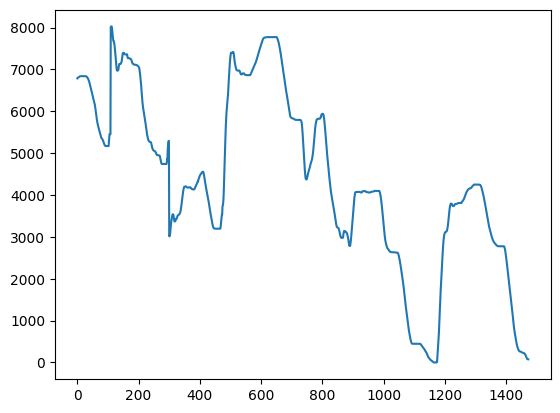

In [16]:
plt.plot(sequences_list_x[0][0]); # Gráfico de una secuencia de la variable X de la tarea 1;

---
<h3>Aplicar padding a todas las secuencias</h3>
Dado que no todas las secuencias tienen la misma longitud, es necesario aplicar padding con ceros para estandarizarlas a una longitud uniforme para que puedan ser procesadas por las redes neuronales.

In [17]:
x_data = [] # Lista para guardar los datos de las secuencias con padding estandarizadas a limit_len
for i, x in enumerate(sequences_list_x):
    # x_data es una lista de 7 elementos, cada elemento es una lista de series
    x_data.append(pad_sequences(x, maxlen=limit_len, dtype='float64', padding='post', truncating='post'))

In [18]:
y_data = [] # Lista para guardar los datos de las secuencias con padding estandarizadas a limit_len
for i, y in enumerate(sequences_list_y):
    # y_data es una lista de 7 elementos, cada elemento es una lista de series
    y_data.append(pad_sequences(y, maxlen=limit_len, dtype='float64', padding='post', truncating='post'))

In [19]:
p_data = [] # Lista para guardar los datos de las secuencias con padding estandarizadas a limit_len
for i, p in enumerate(sequences_list_p):
    # p_data es una lista de 7 elementos, cada elemento es una lista de series
    p_data.append(pad_sequences(p, maxlen=limit_len, dtype='float64', padding='post', truncating='post'))

---
Combinar las secuencias de todas las tareas en un solo arreglo

In [20]:
# Combinar las secuencias de todas las tareas en un solo arreglo
x_tasks_data = np.vstack(x_data) # Apilar secuencias de las tareas verticalmente
print(f'Dimensión del arreglo que contiene las secuencias de todas las tareas: {x_tasks_data.shape}') # Arreglo de numpy con datos de X para todas las tareas

Dimensión del arreglo que contiene las secuencias de todas las tareas: (2177, 1500)


In [21]:
# Combinar las secuencias de todas las tareas en un solo arreglo
y_tasks_data = np.vstack(y_data) # Apilar secuencias de las tareas verticalmente
print(f'Dimensión del arreglo que contiene las secuencias de todas las tareas: {y_tasks_data.shape}') # Arreglo de numpy con datos de Y para todas las tareas

Dimensión del arreglo que contiene las secuencias de todas las tareas: (2177, 1500)


In [22]:
# Combinar las secuencias de todas las tareas en un solo arreglo
p_tasks_data = np.vstack(p_data) # Apilar secuencias de las tareas verticalmente
print(f'Dimensión del arreglo que contiene las secuencias de todas las tareas: {p_tasks_data.shape}') # Arreglo de numpy con datos de presión para todas las tareas

Dimensión del arreglo que contiene las secuencias de todas las tareas: (2177, 1500)


---
Obtención del vector de bits utilizado para insertar la información de la marca de agua en las señales

In [23]:
bits = utilities.palabra_a_bits('watermark') # Función que convierte una cadena de texto a una secuencia de bits
print(f'Bits obtenidos: {bits}')
vector = utilities.get_vector(bits) # Función que regresa una lista de los bits presentes en la cadena. Los números de la lista son del tipo entero
print(f'Vector utilizado para generar la secuencia:\n{vector}')

Bits obtenidos: 011101110110000101110100011001010111001001101101011000010111001001101011
Vector utilizado para generar la secuencia:
[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1]


---
Obtención de la longitud de cada una de las señales (número de time steps)

In [24]:
# Obtener lista de longitudes por tarea mediante la aplicación del método len()
longitudes_t1 = [len(data) for data in data_dict['t1_data']]
longitudes_t2 = [len(data) for data in data_dict['t2_data']]
longitudes_t3 = [len(data) for data in data_dict['t3_data']]
longitudes_t4 = [len(data) for data in data_dict['t4_data']]
longitudes_t5 = [len(data) for data in data_dict['t5_data']]
longitudes_t6 = [len(data) for data in data_dict['t6_data']]
longitudes_t7 = [len(data) for data in data_dict['t7_data']]

# Combinar lista de longitudes en un solo arreglo utilizando hstack
timestamps = np.hstack((longitudes_t1, longitudes_t2, longitudes_t3, longitudes_t4, longitudes_t5, longitudes_t6, longitudes_t7))

print(f'Dimensiones del arreglo de time steps: {timestamps.shape}') # Dimensiones del arreglo de time steps

Dimensiones del arreglo de time steps: (902,)


---
Obtener arreglos de coeficientes de DWT que se utilizarán para el entrenamiento del modelo generador

In [25]:
# La función regresa los coeficientes DWT de la señal original
# También regresa los coeficientes DWT modificados por la secuencia de bits
# wavedecs_data es una lista de dataframes. Las columnas de cada dataframe contienen los coeficientes de la descomposición DWT y los mismos coeficientes modificados por la secuencia de bits
wavedecs_data = utilities.get_dwt_coeffs(x_tasks_data, vector, 0.5)
x_data = []

# Guardar en una lista solo las series con los coeficientes originales DWT
for data in wavedecs_data:
    x_data.append(data.original_c.values) # Obtener del dataframe solo los coeficientes originales DWT

# Convertir lista a arreglo de numpy
x_data = np.array(x_data)
print(f'Dimensiones de los datos de entrada correspondientes a los coeficientes de las señales de la variable X: {x_data.shape}') # Dimensiones del arreglo de numpy con los coeficientes DWT originales para cada una de las secuencias

Dimensiones de los datos de entrada correspondientes a los coeficientes de las señales de la variable X: (2177, 380)


In [26]:
# La función regresa los coeficientes DWT de la señal original
# También regresa los coeficientes DWT modificados por la secuencia de bits
# wavedecs_data es una lista de dataframes
wavedecs_data_y = utilities.get_dwt_coeffs(y_tasks_data, vector, 0.5)
y_data = []

# Guardar en una lista solo las series con los coeficientes originales DWT
for data in wavedecs_data_y:
    y_data.append(data.original_c.values)

# Convertir lista a arreglo de numpy
y_data = np.array(y_data)
print(f'Dimensiones de los datos de entrada correspondientes a los coeficientes de las señales de la variable Y: {y_data.shape}') # Dimensiones del arreglo de numpy con los coeficientes DWT originales para cada una de las secuencias

Dimensiones de los datos de entrada correspondientes a los coeficientes de las señales de la variable Y: (2177, 380)


Combinar datos de los arreglos con los coeficientes de las señales de X y Y en uno solo

In [27]:
input_data = np.stack((x_data, y_data), axis=-1) # Apilar los arreglos de numpy horizontalmente
print(f'Dimensiones de los datos de entrada del modelo generador: {input_data.shape}')

Dimensiones de los datos de entrada del modelo generador: (2177, 380, 2)


---
Etiquetar datos de entrada para aplicar una división estratificada en conjuntos de entrenamiento, validación y prueba.

In [28]:
# Se crea una lista con valores del 1 al 7
labels = []
for i, data in enumerate(sequences_list_x): # Recorrer la lista con las secuencias de cada tarea de la base de datos
    arr = np.ones(len(data))*(i+1) # Crea un arreglo con valores del 1 al 7 dependiendo de la tarea. El número de elementos es igual al número de secuencias de la tarea
    labels.append(arr) # Agregar el arreglo a la lista de etiquetas

data_labels = np.hstack(labels) # Combinar listas en un solo arreglo
print(f'Dimensión del arreglo de etiquetas de los datos: {data_labels.shape}')

Dimensión del arreglo de etiquetas de los datos: (2177,)


---
Obtener conjuntos de entrenamiento, validación y prueba para el generador de marcas de agua

In [29]:
# En el generador de marcas de agua los datos objetivo son los mismos que los de la entrada ya que se busca
# que la red aprenda a insertar los bits de la marca de agua de la manera
# más imperceptible posible
output_data = input_data

# Realizar división de conjuntos, obteniendo datos de entrada, de salida, presiones y etiquetas de los datos que corresponden a su tarea
x_train, x_test_val, y_train, y_test_val, x_train_data, x_test_val_data, y_train_data, y_test_val_data, p_train, p_test_val, dlabels_train, dlabels_test_val = train_test_split(
    input_data, output_data, x_tasks_data, y_tasks_data, p_tasks_data, data_labels, test_size=0.25, stratify=data_labels, random_state=42)

x_val, x_test, y_val, y_test, x_val_data, x_test_data, y_val_data, y_test_data, p_val, p_test, dlabels_val, dlabels_test = train_test_split(
    x_test_val, y_test_val, x_test_val_data, y_test_val_data, p_test_val, dlabels_test_val, test_size=0.4, random_state=42)


print(f'Dimensiones datos de entrenamiento:\nx train - {x_train.shape}\ny train - {y_train.shape}') # Dimensiones de los datos de entrenamiento
print(f'Dimensiones datos de validación:\nx validation - {x_val.shape}\ny validation - {y_val.shape}') # Dimensiones de los datos de validación
print(f'Dimensiones datos de prueba:\nx test - {x_test.shape}\ny test - {y_test.shape}') # Dimensiones de los datos de prueba

Dimensiones datos de entrenamiento:
x train - (1632, 380, 2)
y train - (1632, 380, 2)
Dimensiones datos de validación:
x validation - (327, 380, 2)
y validation - (327, 380, 2)
Dimensiones datos de prueba:
x test - (218, 380, 2)
y test - (218, 380, 2)


---

## Definición de funciones

Definición de bloque convolucional ResNet con SpatialDropout

In [30]:
def convolutional_block_sd(x, filter, strides):
    x_skip = x
    # Capa 1
    x = layers.Conv1D(filter, kernel_size=3, strides=strides, padding='same')(x)
    x = layers.SpatialDropout1D(0.2)(x)
    x = layers.BatchNormalization(axis=-1)(x)
    x = layers.Activation('relu')(x)
    # Capa 2
    x = layers.Conv1D(filter, kernel_size=3, padding='same')(x)
    x = layers.SpatialDropout1D(0.2)(x)
    x = layers.BatchNormalization(axis=-1)(x)
    # Procesar x_skip
    x_skip = layers.Conv1D(filter, kernel_size=1, strides=strides)(x_skip)
    # Sumar res
    x = layers.Add()([x, x_skip])
    x = layers.Activation('relu')(x)
    return x

---
Definición de bloque convolucional ResNet sin SpatialDropout

In [31]:
def convolutional_block(x, filter):
    x_skip = x
    # Capa 1
    x = layers.Conv1D(filter, kernel_size=3, strides=2, padding='same')(x)
    x = layers.BatchNormalization(axis=-1)(x)
    x = layers.Activation('relu')(x)
    # Capa 2
    x = layers.Conv1D(filter, kernel_size=3, padding='same')(x)
    x = layers.BatchNormalization(axis=-1)(x)
    # Procesar x_skip
    x_skip = layers.Conv1D(filter, kernel_size=1, strides=2)(x_skip)
    # Sumar res
    x = layers.Add()([x, x_skip])
    x = layers.Activation('relu')(x)
    return x

---
Definición de función que regresa señales original y con marca de agua en el dominio del tiempo a partir de un número aleatorio para la comparación

In [32]:
def get_wm_sample(rand_index, signals_data_x, signals_data_y, y_pred, y_test):
    x_og_signal = signals_data_x[rand_index]
    y_og_signal = signals_data_y[rand_index]
    dwt_signal_x = pywt.wavedec(signals_data_x[rand_index], wavelet='db4', level=3)
    dwt_signal_y = pywt.wavedec(signals_data_y[rand_index], wavelet='db4', level=3)
    wm_coeff_signal_x = [np.zeros_like(array) for array in dwt_signal_x] # Lista de arreglo de ceros con el número de coeficientes de las señales originales
    wm_coeff_signal_y = [np.zeros_like(array) for array in dwt_signal_y] # Lista de arreglo de ceros con el número de coeficientes de las señales originales
    wm_coeff_true_signal_x = [np.zeros_like(array) for array in dwt_signal_x] # Lista de arreglo de ceros con el número de coeficientes de las señales originales
    wm_coeff_true_signal_y = [np.zeros_like(array) for array in dwt_signal_y] # Lista de arreglo de ceros con el número de coeficientes de las señales originales
    # y_sample = y_pred[rand_index].reshape(-1,) # Muestra de coeficientes predichos por el modelo
    wm_coeff_signal_x[2] = y_pred[rand_index,:,0] #Obtener coeficientes predichos de señal x
    wm_coeff_signal_y[2] = y_pred[rand_index,:,1] #Obtener coeficientes predichos de señal y
    wm_coeff_true_signal_x[2] = y_test[rand_index,:,0] # Muestra de coeficientes verdaderos
    wm_coeff_true_signal_y[2] = y_test[rand_index,:,1] # Muestra de coeficientes verdaderos
    wm_gen_signal_x = pywt.waverec(wm_coeff_signal_x, wavelet='db4') # Señal de marca de agua generada en el dominio del tiempo
    wm_gen_signal_y = pywt.waverec(wm_coeff_signal_y, wavelet='db4') # Señal de marca de agua generada en el dominio del tiempo
    wm_true_signal_x = pywt.waverec(wm_coeff_true_signal_x, wavelet='db4') # Señal de marca de agua en el dominio del tiempo
    wm_true_signal_y = pywt.waverec(wm_coeff_true_signal_y, wavelet='db4') # Señal de marca de agua en el dominio del tiempo
    x_wm_signal = x_og_signal + wm_gen_signal_x
    y_wm_signal = y_og_signal + wm_gen_signal_y
    dwt_wm_signal_x = pywt.wavedec(x_wm_signal, wavelet='db4', level=3)
    dwt_wm_signal_y = pywt.wavedec(y_wm_signal, wavelet='db4', level=3)
    wmarked_coeff_signal_x = [np.zeros_like(array) for array in dwt_wm_signal_x] # Lista de arreglo de ceros con el número de coeficientes de las señales originales
    wmarked_coeff_signal_y = [np.zeros_like(array) for array in dwt_wm_signal_y] # Lista de arreglo de ceros con el número de coeficientes de las señales originales
    # y_sample = y_pred[rand_index].reshape(-1,) # Muestra de coeficientes predichos por el modelo
    wmarked_coeff_signal_x[2] = dwt_wm_signal_x[2] #Obtener coeficientes predichos de señal x
    wmarked_coeff_signal_y[2] = dwt_wm_signal_y[2] #Obtener coeficientes predichos de señal y
    wm_lvl2_signal_x = pywt.waverec(wmarked_coeff_signal_x, wavelet='db4') # Señal de marca de agua en el dominio del tiempo
    wm_lvl2_signal_y = pywt.waverec(wmarked_coeff_signal_y, wavelet='db4') # Señal de marca de agua en el dominio del tiempo
    return wm_gen_signal_x, wm_gen_signal_y, wm_true_signal_x, wm_true_signal_y, wm_lvl2_signal_x, wm_lvl2_signal_y

Definición de función que regresa señales con marca de agua. En la función, los coeficientes de la señal original son reemplazados por los coeficientes predichos por el modelo. La función regresa la señal con la marca de agua ya insertada y ya no es necesario realizar alguna operación adicional.

In [33]:
def get_signals_watermarked(x_tasks_data, predictions, variable='x'):
    if variable == 'x':
        dim = 0
    else:
        dim = 1
    wm_signals = [] # Lista para guardar las señales de marca de agua en dominio del tiempo
    for i, signal in enumerate(x_tasks_data):
        dwt_signal = pywt.wavedec(signal, wavelet='db4', level=3) # Obtener DWT de la señal original
        # wm_coeff_signal = [np.zeros_like(array) for array in dwt_signal] # Arreglos de ceros con dimensiones de la dwt
        # wm_coeff_signal[2] = predictions[i,:,dim] # Sustituir los ceros por la señal predicha por el modelo
        dwt_signal[2] = predictions[i,:,dim]
        wm_signal = pywt.waverec(dwt_signal, wavelet='db4') # Reconstruir la señal con los coeficientes DWT predichos
        wm_signals.append(wm_signal) 
    wm_signals_arr = np.array(wm_signals) # Convertir lista de señales a arreglo de Numpy
    return wm_signals_arr

---
Función para graficar señales original y generada con marcas de agua

In [34]:
def plot_wm(true_signal, gen_signal):
    plt.figure(figsize=(8, 6))
    # Graficar la señal original y la señal generada
    plt.plot(true_signal, label='true signal')
    plt.plot(gen_signal, label='generated signal')

    # Configurar título y etiquetas
    plt.title('Signals comparison')
    plt.xlabel('time step')
    plt.ylabel('X value')
    plt.legend()

    # Mostrar la gráfica
    plt.show()

---
Función para graficar curva de aprendizaje de los modelos

In [35]:
def plot_training_loss(train_loss, val_loss):
    # Configurar el estilo de Seaborn
    sns.set_theme(style='whitegrid')

    # Crear una nueva figura
    plt.figure(figsize=(8, 6))

    # Graficar las pérdidas de entrenamiento y validación
    sns.lineplot(data=val_loss, label='Validation Loss', linestyle='--', linewidth=1.5, color='blue')
    sns.lineplot(data=train_loss, label='Training Loss', linewidth=1.5, color='orange')
    
    # Configurar título y etiquetas
    plt.title('Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend()

    # Mostrar la gráfica
    plt.show()

---
Función para graficar curva de accuracy de detector

In [36]:
def plot_training_acc(train_acc, val_acc):
    # Configurar el estilo de Seaborn
    sns.set_theme(style='whitegrid')

    # Crear una nueva figura
    plt.figure(figsize=(8, 6))

    # Graficar la precisión de entrenamiento y validación
    sns.lineplot(data=val_acc, label='Validation Accuracy', linestyle='--', linewidth=2.5, color='blue')
    sns.lineplot(data=train_acc, label='Training Accuracy', linewidth=2.5, color='orange')
    
    # Configurar título y etiquetas
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Mostrar la gráfica
    plt.show()

---
Función para graficar comparación entre señales en el dominio del tiempo

In [37]:
def plot_wm_signals(original_signals_x, original_signals_y, wm_signals_x, wm_signals_y, index, name):
    # Configurar el estilo de Seaborn
    sns.set_theme(style='ticks', context='paper', rc={'figure.facecolor': 'white', 'grid.color': '0.5', 'grid.linestyle':':', 'axes.facecolor': 'white', 'font.family': ['serif'], 'text.color':'0.0'}, font_scale=1.5)
    x=np.linspace(0,len(original_signals_x[index])/100, len(original_signals_x[index]))
    # Crear una nueva figura
    fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
    # plt.figure(figsize=(10, 4))

    # Graficar la precisión de entrenamiento y validación
    sns.lineplot(x=x, y=wm_signals_x[index]/100, linewidth=3.5, color='orange', ax=axs[0]) #WM signal
    sns.lineplot(x=x, y=original_signals_x[index]/100, linestyle='--', linewidth=1.5, color='blue', ax=axs[0]) #OG
    axs[0].set_ylabel('X (mm)')
    sns.lineplot(x=x, y=wm_signals_y[index]/100, linewidth=3.5, color='orange', ax=axs[1])
    sns.lineplot(x=x, y=original_signals_y[index]/100, linestyle='--', linewidth=1.5, color='blue', ax=axs[1])
    axs[1].set_ylabel('Y (mm)')
    # Configurar título y etiquetas
    plt.xlabel('Time (s)')
    plt.savefig(f'{name}_error_signals.png', dpi=300, bbox_inches='tight')
    # Mostrar la gráfica
    plt.show()

In [38]:
def plot_complete_signal(original_signal_x, wm_signal_x, original_signal_y, wm_signal_y):
    # Configurar el estilo de Seaborn
    sns.set_theme(style='ticks', rc={'figure.facecolor': 'white', 'grid.color': '0.5', 'grid.linestyle':':', 'axes.facecolor': 'white', 'font.family': ['serif'], 'text.color':'0.0'}, font_scale=1.5)
    x=np.linspace(0,len(original_signal_x)/100, len(original_signal_x))

    # Crear una nueva figura
    f, (ax1, ax2) = plt.subplots(2,1, figsize=(12,6))

    # Graficar trazos de señal X en eje 1
    sns.lineplot(x=x, y=wm_signal_x[:len(original_signal_x)]/100, linewidth=3.5, color='orange', ax=ax1)
    sns.lineplot(x=x, y=original_signal_x/100, linestyle='--', linewidth=1.5, color='blue', ax=ax1)
    ax1.set_ylabel('X (mm)')
    ax1.set_xlabel('Time (s)')
    # Graficar trazos de señal Y en eje 1
    sns.lineplot(x=x, y=wm_signal_y[:len(original_signal_y)]/100, linewidth=3.5, color='orange', ax=ax2)
    sns.lineplot(x=x, y=original_signal_y/100, linestyle='--', linewidth=1.5, color='blue', ax=ax2)
    ax2.set_ylabel('Y (mm)')
    ax2.set_xlabel('Time (s)')
    
    # Configurar título y etiquetas
    # sns.despine(left=True, bottom=True)
    # plt.title('Signals comparison')
    # plt.xlabel('Time (s)')
    # plt.ylabel('Amplitude')
    # plt.legend().remove()

    # Mostrar la gráfica
    plt.show()

---
Definir función para mostrar resultados de la clasificación con matriz de confusión

In [39]:
def show_confusion_matrix(x, modelo, y_true):
    sns.set_theme(style='ticks')
    colors = ["lightgrey", "#0070C0"]
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
    predictions = modelo.predict(x)
    predictions = predictions.reshape(-1,)
    y_pred = np.array([1 if element > 0.50 else 0 for element in predictions])
    accuracy = accuracy_score(y_true, y_pred)
    cm_detector = confusion_matrix(y_true, y_pred)

    cm_percentage = cm_detector.astype('float') / cm_detector.sum() * 100

# Crear el texto combinado con números absolutos y porcentajes
    def format_cm(cm, cm_percentage):
        rows, cols = cm.shape
        formatted = np.empty((rows, cols), dtype=object)
        for i in range(rows):
            for j in range(cols):
                formatted[i, j] = f'{cm[i, j]}\n({cm_percentage[i, j]:.1f}%)'
        return formatted

    formatted_cm = format_cm(cm_detector, cm_percentage)

    # Crear la gráfica de la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_detector, annot=formatted_cm, fmt='', cmap=cmap, cbar=False, 
                xticklabels=['Original Signal', 'Watermarked Signal'], 
                yticklabels=['Original Signal', 'Watermarked Signal'],
                annot_kws={"size": 16, "weight":"bold"},
                # linewidths=1, linecolor='black',
                )

    # Configurar título y etiquetas
    # plt.title(f'Accuracy: {accuracy*100:.2f}%', fontsize=16)
    # plt.xlabel('Predicted Signal Type', fontsize=14)
    # plt.ylabel('Actual Signal Type', fontsize=14)
    plt.show()

---
Definir función para graficar comparación de dibujos hechos con señal original y señal con marca de agua

In [40]:
def plot_drawing(x_arr, y_arr, wmarked_signals_x, wmarked_signals_y, p_arr, rand_index, name):
    x1_data = x_arr[rand_index]
    x1_data_reflected = x1_data.copy()
    x1_data_reflected[:] = -x1_data_reflected[:]
    new_x1 = (x1_data_reflected - np.min(x1_data_reflected))/100
    x2_data = wmarked_signals_x[rand_index]
    x2_data_reflected = x2_data.copy()
    x2_data_reflected[:] = -x2_data_reflected[:]
    new_x2 = (x2_data_reflected - np.min(x2_data_reflected))/100
    y1_data = y_arr[rand_index]/100
    y2_data = wmarked_signals_y[rand_index]/100
    hue_labels = p_arr[rand_index]
    sns.set_theme(style='ticks', context='paper', rc={'figure.facecolor': 'white', 'grid.color': '0.5', 'grid.linestyle':':', 'axes.facecolor': 'white', 'font.family': ['Times New Roman'], 'text.color':'0.0'}, font_scale=1.5)
    fig, axs = plt.subplots(1, 2, figsize=(10,6))
    sns.scatterplot(x=new_x1[hue_labels == 1], y=y1_data[hue_labels == 1], color = 'blue', ax=axs[0])
    sns.scatterplot(x=new_x2[hue_labels == 1], y=y2_data[hue_labels == 1], color = 'coral', alpha=0.4, ax=axs[0])
    axs[0].set_xlabel("X (mm)")
    axs[0].set_ylabel("Y (mm)")
    axs[0].set_aspect('equal', adjustable='box')

    sns.scatterplot(x=new_x1[hue_labels == 0], y=y1_data[hue_labels == 0], color = 'blue', ax=axs[1])
    sns.scatterplot(x=new_x2[hue_labels == 0], y=y2_data[hue_labels == 0], color = 'coral', alpha=0.4, ax=axs[1])
    axs[1].set_xlabel("X (mm)")
    axs[1].set_aspect('equal', adjustable='box')
    plt.ylabel("Y (mm)")
    plt.savefig(f'{name}.png', dpi=2000, bbox_inches='tight')
    plt.show()

In [41]:
def plot_complete_drawing(x1_data, y1_data, x2_data, y2_data, p_arr):
    # Señal x original
    x1_data_reflected = x1_data.copy()
    x1_data_reflected[:] = -x1_data_reflected[:]
    new_x1 = (x1_data_reflected - np.min(x1_data_reflected))/100
    # Señal x wm
    x2_data = x2_data[:len(x1_data)]
    x2_data_reflected = x2_data.copy()
    x2_data_reflected[:] = -x2_data_reflected[:]
    new_x2 = (x2_data_reflected - np.min(x2_data_reflected))/100
    y1_data = y1_data/100
    y2_data = y2_data[:len(y1_data)]/100
    hue_labels = p_arr
    sns.set_theme(style='ticks', context='paper', font_scale=1.5, rc={'font.family': ['serif']})
    fig, axs = plt.subplots(2, 1, figsize=(15,8))
    sns.scatterplot(x=new_x1[hue_labels == 1], y=y1_data[hue_labels == 1], color = 'blue', ax=axs[0], s=10)
    sns.scatterplot(x=new_x2[hue_labels == 1], y=y2_data[hue_labels == 1], color = 'coral', alpha=0.4, ax=axs[0], s=10)
    axs[0].set_aspect('equal', adjustable='box')
    axs[0].set_xlabel('X (mm)')
    axs[0].set_ylabel('Y (mm)')

    sns.scatterplot(x=new_x1[hue_labels == 0], y=y1_data[hue_labels == 0], color = 'blue', ax=axs[1], s=10)
    sns.scatterplot(x=new_x2[hue_labels == 0], y=y2_data[hue_labels == 0], color = 'coral', alpha=0.4, ax=axs[1], s=10)
    axs[1].set_aspect('equal', adjustable='box')
    axs[1].set_xlabel('X (mm)')
    axs[1].set_ylabel('Y (mm)')
    # plt.ylabel('Y (mm)')
    plt.show()

---
Función para definir scheduler de entrenamiento del generador

In [42]:
# def scheduler(epoch, lr):
#     if epoch < 100: # Ajuste de la reducción del Lr
#         return lr
#     elif epoch%100 != 0:
#         return lr
#     else:
#         return round(lr*(0.1),8)
# callback_lr_scheduler = LearningRateScheduler(scheduler)

In [43]:
def scheduler(epoch, lr):
    if epoch < 200: # Ajuste de la reducción del Lr
        return lr
    elif epoch>200:
        return lr
    else:
        return round(lr*(0.1),8)
callback_lr_scheduler = LearningRateScheduler(scheduler)

---
Función para definir scheduler de entrenamiento del detector

In [44]:
def scheduler_detector(epoch, lr):
    if epoch < 20:
        return lr
    elif epoch%20 != 0:
        return lr
    else:
        return round(lr*(0.1),8)
lr_scheduler_detector = LearningRateScheduler(scheduler_detector)

---
Definición de capa de Embedding de la marca de agua en el mapa de activación del generador.  

- Se define una función que aplica la operación floor de manera suave para que los gradientes se propaguen adecuadamente durante el entrenamiento.
- El parámetro delta controla la aproximación de la función.
- Se definen operaciones para modificar el mapa de activación de acuerdo a la regla de modificación de los valores siguiendo la secuencia de bits que contiene la información de la marca de agua.

In [45]:
class EmbeddingLayer(layers.Layer):
    def __init__(self, units, input_dim, bits_sequence, delta=0.01):
        super().__init__()
        self.units = units
        self.input_dim = input_dim 
        self.bits_sequence = bits_sequence # Secuencia de bits
        self.delta = delta # Parámetro que controla la aproximación de la función

    def trg(self, x):
        return 1 - 2 * tf.acos((1 - self.delta) * tf.sin(2 * np.pi * x)) / np.pi

    def sqr(self, x):
        return 2 * tf.atan(tf.sin(2 * np.pi * x) / self.delta) / np.pi

    def swt(self, x):
        return (1 + self.trg((2 * x - 1) / 4) * self.sqr(x / 2)) / 2

    def smooth_floor(self, x):
        return x - self.swt(x)

    def call(self, inputs):
        # Aplicar la aproximación suave de floor en lugar de ops.floor
        floored_inputs = self.smooth_floor(inputs) # Aplicación de la aproximación de la función floor
        mask = ops.equal(self.bits_sequence, 1)
        modified_signal = ops.where(mask, floored_inputs + 3/4, floored_inputs + 1/4) # Aplicación de la regla de modificación
        return modified_signal

## Definición de secuencia de bits para utilizar en generador

Obtener secuencia de bits correspondiente a la marca de agua

In [46]:
x, y = utilities.get_signal(vector, 190)
bits_sequence = np.array(y[:190])
bits_sequence[bits_sequence == -1] = 0
print(f'Forma de la secuencia de bits de prueba: {bits_sequence.shape}')

Forma de la secuencia de bits de prueba: (190,)


Obtener arreglo de secuencia de bits de la forma necesaria para utilizarlo en la red.  
El mapa de activación en el que se insertará la secuencia tiene la forma de (190,8)

In [47]:
#Se utiliza la función tile para replicar la información de la secuencia de bits a lo ancho de 8 columnas
complete_sequence = np.tile(bits_sequence, (8,1)).T.reshape(1,-1,8)
print(f'Forma de la secuencia de bits: {complete_sequence.shape}')

Forma de la secuencia de bits: (1, 190, 8)


## Definición de la arquitectura del generador

In [48]:
def generator(bits_sequence): # Generador con capa de embedding
    input_shape = (380, 2)
    inputs = layers.Input(shape=input_shape)
    # Bloque Encoder
    y = layers.Conv1D(filters=8, kernel_size=3, strides=1, padding='same', activation='relu', use_bias=True)(inputs)
    y = layers.BatchNormalization(axis=-1)(y) # Prevenir explotación o desvanecimiento de gradientes
    y = convolutional_block(y, 64)
    y = layers.Bidirectional(layers.LSTM(units=64, activation='tanh', recurrent_activation='sigmoid', use_bias=True, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(y)
    y = layers.Conv1D(filters=8, kernel_size=3, strides=1, padding='same', activation='relu', use_bias=True,)(y)
    y = layers.BatchNormalization(axis=-1)(y)
    # Embedding layer
    y = EmbeddingLayer(units=8, input_dim=190, bits_sequence=bits_sequence)(y)
    # # Bloque Decoder
    y = layers.Conv1DTranspose(filters=8, kernel_size=3, strides=2, padding='same', activation='relu', use_bias=True,)(y)
    y = layers.Bidirectional(layers.LSTM(units=64, activation='tanh', recurrent_activation='sigmoid', use_bias=True, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(y)
    #Capa de atención
    attention = layers.Attention()([y, y])
    y = layers.Concatenate()([y, attention])
    y = convolutional_block_sd(y, 64, strides=2)
    outputs = layers.Conv1DTranspose(filters=2, kernel_size=3, strides=2, padding='same', activation='linear', use_bias=True)(y)
    model = Model(inputs = inputs, outputs=outputs)
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss=losses.MeanSquaredError(),)
    return model

In [49]:
model = generator(complete_sequence)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 380, 2)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 380, 8)    │         56 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 380, 8)    │         32 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 190, 64)   │      1,600 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 190, 64)   │        256 │ conv1d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 190, 64)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 190, 64)   │     12,352 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 190, 64)   │        256 │ conv1d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 190, 64)   │        576 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 190, 64)   │          0 │ batch_normalizat… │
│                     │                   │            │ conv1d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 190, 64)   │          0 │ add[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 190, 128)  │     66,048 │ activation_1[0][… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 190, 8)    │      3,080 │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 190, 8)    │         32 │ conv1d_4[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_layer     │ (None, 190, 8)    │          0 │ batch_normalizat… │
│ (EmbeddingLayer)    │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_transpose    │ (None, 380, 8)    │        200 │ embedding_layer[… │
│ (Conv1DTranspose)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 380, 128)  │     37,376 │ conv1d_transpose… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 380, 128)  │          0 │ bidirectional_1[… │
│ (Attention)         │                   │            │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 200,778 (784.29 KB)

 Trainable params: 200,234 (782.16 KB)

 Non-trainable params: 544 (2.12 KB)

## Entrenamiento del generador

In [49]:
checkpoint = ModelCheckpoint('best_model_gen_1001.weights.h5',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=True,
                             mode='min'
                             )

In [52]:
# train_history = model.fit(x=x_train, 
#                           y=y_train, 
#                           batch_size=64,
#                           epochs=500,
#                           verbose=1,
#                           validation_data=(x_val, y_val),
#                           shuffle=True,
#                           callbacks = [checkpoint],
#                           )

Epoch 1/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - loss: 13625.6514
Epoch 1: val_loss improved from inf to 16517.31836, saving model to best_model_gen_2210.weights.h5
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 287ms/step - loss: 13645.6689 - val_loss: 16517.3184
Epoch 2/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - loss: 14813.6982
Epoch 2: val_loss improved from 16517.31836 to 16512.27148, saving model to best_model_gen_2210.weights.h5
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 258ms/step - loss: 14779.2393 - val_loss: 16512.2715
Epoch 3/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - loss: 12324.8506
Epoch 3: val_loss improved from 16512.27148 to 16455.01562, saving model to best_model_gen_2210.weights.h5
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 264ms/step - loss: 12368.6943 - val_loss: 16455.0156
Epoch 4/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - loss: 12494.7031
Epoch 4: val_loss improved from 16455.01562 to 16175.29492, saving model to best_model_gen_2210.weights.h5
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 271ms/step -

Guardar pesos del modelo entrenado

In [ ]:
# model.save_weights('gen_weights_0710_2.weights.h5')

## Resultados del generador

### Curvas de entrenamiento

In [53]:
t_loss = train_history.history['loss'] # Obtener pérdida de entrenamiento del modelo
v_loss = train_history.history['val_loss'] # Obtener pérdida de validación del modelo

In [57]:
# training_dict = {'loss':t_loss, 'val_loss':v_loss} # Obtener diccionario con las pérdidas de entrenamiento y validación
# pd.to_pickle(training_dict, 'gen_2210_history.pkl') # Guardar historial de entrenamiento en un archivo pickle

In [86]:
with open('best_generator_history.pkl', 'rb') as f: # Cargar historial de entrenamiento para graficar curvas de entrenamiento
    train_dict = pd.read_pickle(f)
t_loss = train_dict['loss']
v_loss = train_dict['val_loss']

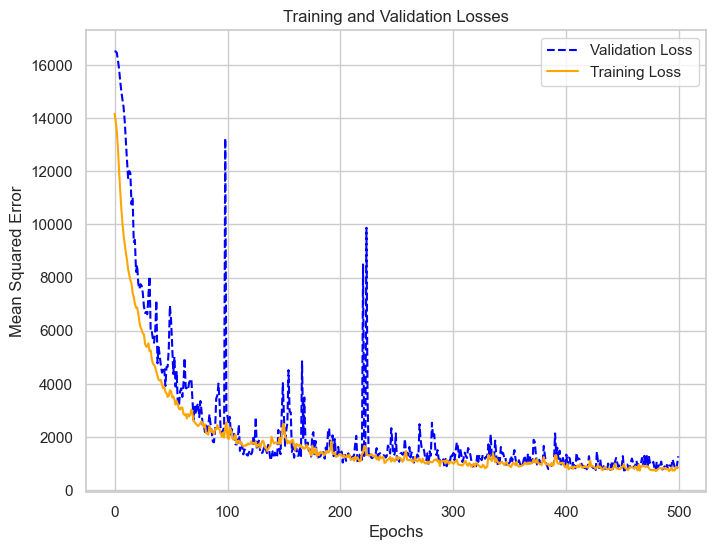

In [87]:
plot_training_loss(t_loss, v_loss) # Graficar curvas de entrenamiento

### Carga del modelo entrenado

In [52]:
model.load_weights('best_generator.weights.h5')

c:\Users\Omar\anaconda3\envs\maestria\lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 90 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [53]:
model.evaluate(x_test, y_test, batch_size=32)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 448.9615


458.7790222167969

Obtener señales con marca de agua

In [54]:
predictions = model.predict(x_test, batch_size=32) # Predicciones de la forma (x_data, 380, 1)
coeff_wm_signals_x = get_signals_watermarked(x_test_data, predictions)
coeff_wm_signals_y = get_signals_watermarked(y_test_data, predictions, variable='y')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step


### Comparación coeficientes generados y originales

Comparación entre señales original y generada considerando el conjunto de prueba. Se comparan las señales obtenidas considerando solo los coeficientes de aproximación de nivel 2 y fijano los coeficientes restantes en valores de cero.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


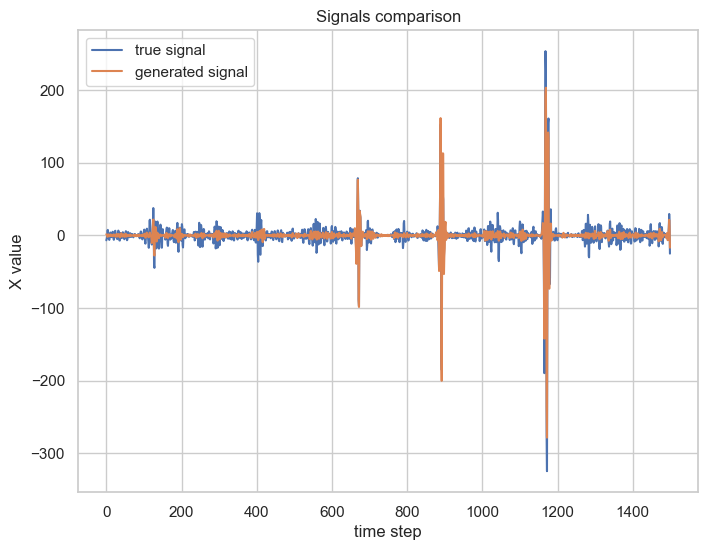

In [57]:
y_pred = model.predict(x_test)
rand_index = np.random.randint(218)
wm_gen_signal_x, wm_gen_signal_y, wm_true_signal_x, wm_true_signal_y, wm_lvl2_signal_x, wm_lvl2_signal_y = get_wm_sample(rand_index, x_tasks_data, y_tasks_data, y_pred, y_test)
plot_wm(wm_true_signal_x, wm_gen_signal_x)

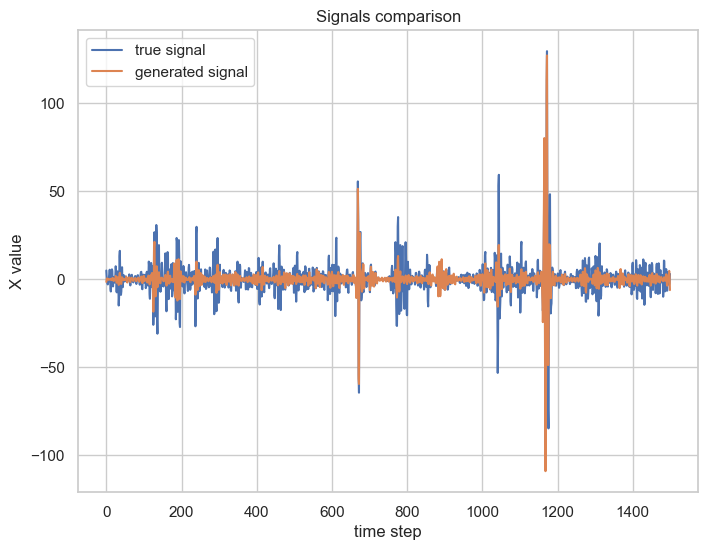

In [58]:
plot_wm(wm_true_signal_y, wm_gen_signal_y)

### Comparación de señales original y generada en el dominio del tiempo

Comparación entre señales en el dominio del tiempo.  
Se compara la señal original con la señal con marca de agua insertada.

In [59]:
coeff_wm_signals_x = get_signals_watermarked(x_test_data, predictions)
coeff_wm_signals_y = get_signals_watermarked(y_test_data, predictions, variable='y')
rand_index = np.random.randint(218)
print(rand_index)

63


### Gráfica de movimientos en el aire y sobre la superficie

Mostrar dibujo con señales originales y con marca de agua.

Ciclo para obtener un arreglo con valores binarios sobre la presión en la tableta

In [60]:
for p_array in p_test:
    p_array[p_array > 0] = 1

Mostrar comparación de dibujos

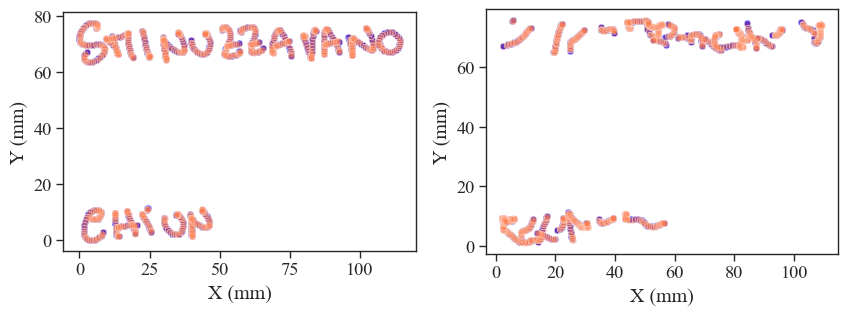

In [62]:
rand_index = np.random.randint(218) # 73
plot_drawing(x_test_data, y_test_data, coeff_wm_signals_x, coeff_wm_signals_y, p_test, rand_index, 'mean_performance_strokes')

### Resultados generador secuencia completa

In [63]:
random_index = np.random.randint(0, 902)#784#712
print(random_index)
chosen_signal = (signals_x_data[random_index], signals_y_data[random_index], signals_p_data[random_index])
print(len(chosen_signal[0]))
sequences = ([], [], [])
if len(chosen_signal[0]) > limit_len:
    i=0
    remaining_len = len(chosen_signal[0])
    while remaining_len > 0:
        sequences[0].append(chosen_signal[0][i*limit_len:limit_len+i*limit_len])
        sequences[1].append(chosen_signal[1][i*limit_len:limit_len+i*limit_len])
        sequences[2].append(chosen_signal[2][i*limit_len:limit_len+i*limit_len])
        i+=1
        remaining_len-=limit_len
else:
    sequences[0].append(chosen_signal[0])
    sequences[1].append(chosen_signal[1])
    sequences[2].append(chosen_signal[2])

# x_sample, y_sample, p_sample = sequences
x_sample = np.array(pad_sequences(sequences[0], maxlen=limit_len, dtype='float64', padding='post', truncating='post')) #Lista con arrays de cada secuencia
y_sample = np.array(pad_sequences(sequences[1], maxlen=limit_len, dtype='float64', padding='post', truncating='post'))
p_sample = np.array(pad_sequences(sequences[2], maxlen=limit_len, dtype='float64', padding='post', truncating='post'))

531
830


In [64]:
wavedecs_data_x = utilities.get_dwt_coeffs(x_sample, vector, 0.5)
x_data_sample = []

for data in wavedecs_data_x:
    x_data_sample.append(data.original_c.values)

x_data_sample = np.array(x_data_sample)

wavedecs_data_y = utilities.get_dwt_coeffs(y_sample, vector, 0.5)
y_data_sample = []

for data in wavedecs_data_y:
    y_data_sample.append(data.original_c.values)

y_data_sample = np.array(y_data_sample)
test_data = np.stack((x_data_sample, y_data_sample), axis=-1) #Forma (#de muestras, 380, 2)
print(f'Forma de los datos de prueba: {test_data.shape}')

Forma de los datos de prueba: (1, 380, 2)


In [65]:
predictions =  model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


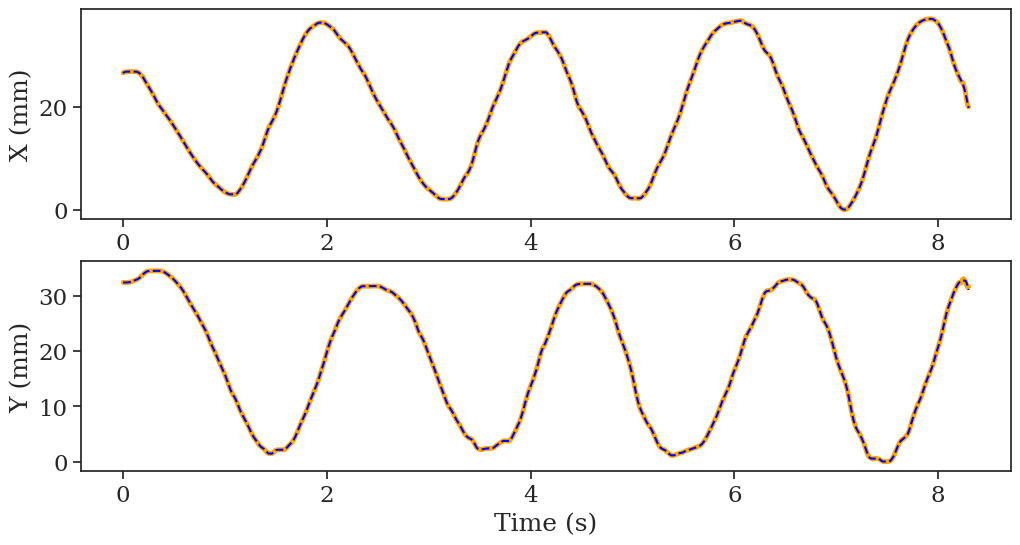

In [66]:
coeff_wm_signals_x = get_signals_watermarked(x_sample, predictions)
coeff_wm_signals_y = get_signals_watermarked(y_sample, predictions, variable='y')
x_test_signal = np.concatenate(coeff_wm_signals_x)
y_test_signal = np.concatenate(coeff_wm_signals_y)
plot_complete_signal(chosen_signal[0], x_test_signal, chosen_signal[1], y_test_signal)
# plot_complete_signal(chosen_signal[1], y_test_signal)

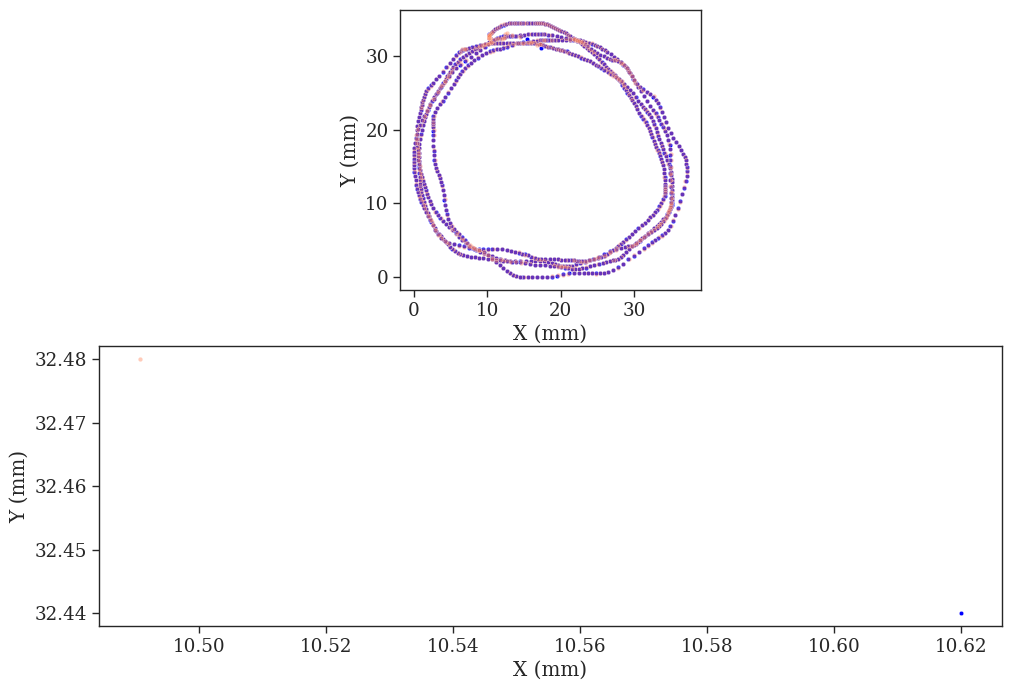

In [67]:
p_test_signal = chosen_signal[2].to_numpy()
p_test_signal[p_test_signal > 0] = 1
len(p_test_signal)
plot_complete_drawing(chosen_signal[0], chosen_signal[1], x_test_signal, y_test_signal, p_test_signal)

### Gráficas de errores del generador

In [68]:
y_pred = model.predict(x_test)
gen_test_losses = mean_squared_error(y_test, y_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [69]:
gen_test_losses_means = tf.reduce_mean(gen_test_losses, axis=1) #Obtener las medias para los errores de cada señal

Obtener errores por tarea en el testset

In [70]:
# errors_t1 = gen_test_losses_means[dlabels_test==1]
errors = []
errors_means = []
for i in range(1,8):
    errors.append(gen_test_losses_means[dlabels_test==i].numpy())
    errors_means.append(tf.reduce_mean(gen_test_losses_means[dlabels_test==i]).numpy())

In [71]:
test_losses_mean = tf.reduce_mean(gen_test_losses_means) #Obtener la media del arreglo de medias
closest_mean_val_index = tf.argmin(tf.abs(gen_test_losses_means-test_losses_mean)) # Obtener el índice del valor más cercano a la media
print(f'Valor de pérdida más cercano al error promedio: {gen_test_losses_means[closest_mean_val_index].numpy()}' )
print(f'Índice del valor de pérdida más cercano al error promedio: {closest_mean_val_index.numpy()}' )

Valor de pérdida más cercano al error promedio: 456.7351989746094
Índice del valor de pérdida más cercano al error promedio: 73


Valor mínimo

In [74]:
min_value = tf.reduce_min(gen_test_losses_means) #Obtener el valor mínimo de error promedio
min_index = tf.argmin(gen_test_losses_means) #Obtener el índice del valor mínimo
print(f'Valor de pérdida mínimo: {gen_test_losses_means[min_index].numpy()}' )
print(f'Índice del valor de pérdida mínimo: {min_index.numpy()}' )

Valor de pérdida mínimo: 4.460233211517334
Índice del valor de pérdida mínimo: 33


In [75]:
max_value = tf.reduce_max(gen_test_losses_means)
max_index = tf.argmax(gen_test_losses_means)
print(f'Valor de pérdida máximo: {gen_test_losses_means[max_index].numpy()}' )
print(f'Índice del valor de pérdida máximo: {max_index.numpy()}' )

Valor de pérdida máximo: 6941.67236328125
Índice del valor de pérdida máximo: 20


Gráfica de señal con el menor error

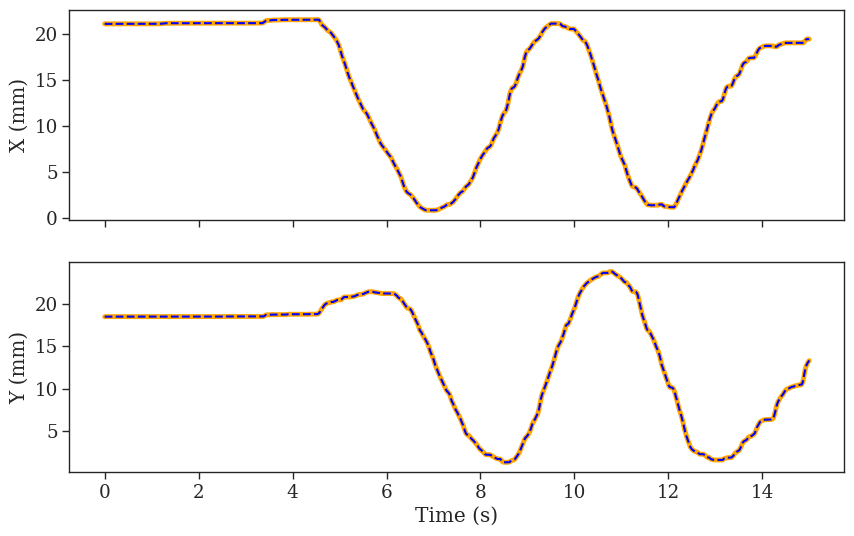

Gráfica de la señal con un error promedio correspondiente a la tarea: 4.0


In [76]:
coeff_wm_signals_x = get_signals_watermarked(x_test_data, y_pred)
coeff_wm_signals_y = get_signals_watermarked(y_test_data, y_pred, variable='y')
plot_wm_signals(x_test_data, y_test_data, coeff_wm_signals_x, coeff_wm_signals_y, min_index, 'min')
print(f'Gráfica de la señal con un error promedio correspondiente a la tarea: {dlabels_test[min_index]}')
# plot_wm_signals(y_test_data, coeff_wm_signals_y, min_index, channel='Y')

Gráfica de señal con el mayor error

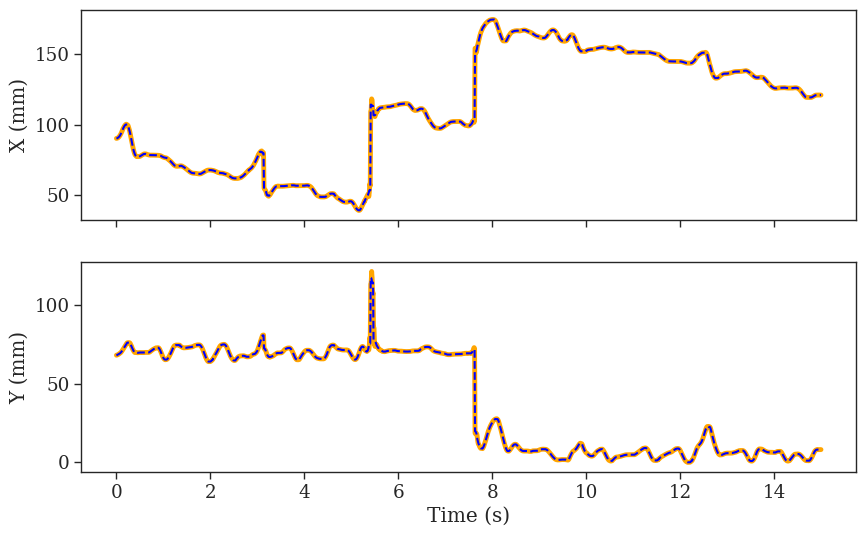

Gráfica de la señal con un error promedio correspondiente a la tarea: 3.0


In [77]:
plot_wm_signals(x_test_data, y_test_data, coeff_wm_signals_x, coeff_wm_signals_y, max_index, 'max')
# plot_wm_signals(y_test_data, coeff_wm_signals_y, max_index)
print(f'Gráfica de la señal con un error promedio correspondiente a la tarea: {dlabels_test[max_index]}')

Gráfica de señal con un error cercano al promedio

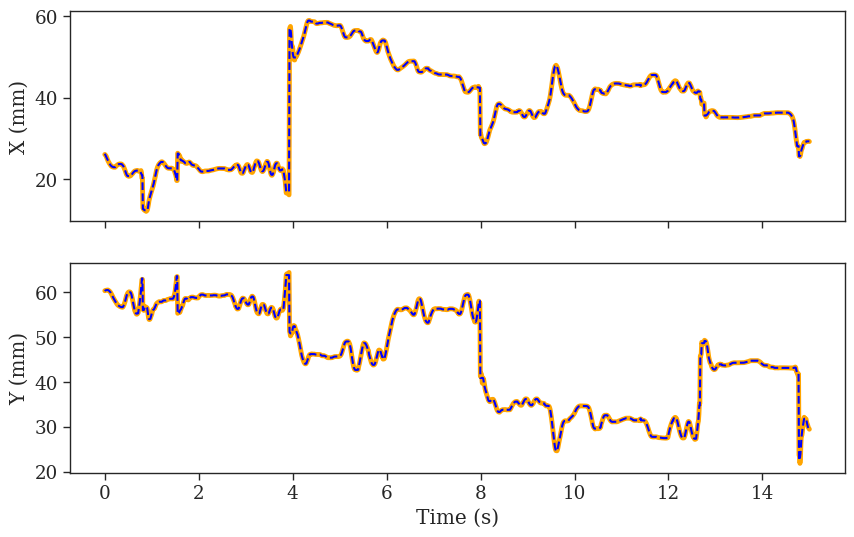

Gráfica de la señal con un error promedio correspondiente a la tarea: 6.0


In [78]:
plot_wm_signals(x_test_data, y_test_data, coeff_wm_signals_x, coeff_wm_signals_y, closest_mean_val_index, 'mean')
print(f'Gráfica de la señal con un error promedio correspondiente a la tarea: {dlabels_test[closest_mean_val_index]}')

In [79]:
wm_signals = np.stack((coeff_wm_signals_x, coeff_wm_signals_y), axis=-1)
print(f'Forma del test set de las señales con marca de agua: {wm_signals.shape}')
og_signals = np.stack((x_test_data, y_test_data), axis=-1)
print(f'Forma del test set de las señales originales: {og_signals.shape}')

Forma del test set de las señales con marca de agua: (218, 1500, 2)
Forma del test set de las señales originales: (218, 1500, 2)


In [80]:
gen_test_differences = mean_squared_error(og_signals, wm_signals)
print(f'Forma del test set de las señales originales: {gen_test_differences.shape}')

Forma del test set de las señales originales: (218, 1500)


# Detector

## Cargar datos de entrenamiento del detector

Combinar señales originales en un solo arreglo

In [81]:
detector_original_data = np.stack((x_tasks_data, y_tasks_data), axis=-1)
detector_original_data.shape

(2177, 1500, 2)

In [82]:
predictions = model.predict(input_data)
coeff_wm_signals_x = get_signals_watermarked(x_tasks_data, predictions)
coeff_wm_signals_y = get_signals_watermarked(y_tasks_data, predictions, variable='y')

69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step


Combinar señales predichas en un solo arreglo

In [83]:
detector_predicted_data = np.stack((coeff_wm_signals_x, coeff_wm_signals_y), axis=-1)
detector_predicted_data.shape

(2177, 1500, 2)

Combinar señales de entrada en un solo arreglo

In [84]:
detector_input_data = np.vstack((detector_original_data, detector_predicted_data))
detector_input_data.shape

(4354, 1500, 2)

In [85]:
zero_labels = np.zeros(len(detector_original_data))
one_labels = np.ones(len(detector_predicted_data))
labels = np.hstack((zero_labels, one_labels))

Guardar datos de entrenamiento del detector

In [ ]:
# detector_dict_data = {'input_data':detector_input_data, 'labels':labels}
# pd.to_pickle(detector_dict_data, 'detector_xy_data_augmentation_2.pkl')

In [88]:
DATA = 'detector_xy_data_augmentation_2.pkl'
with open(DATA, 'rb') as f:
    detector_data_dict = pd.read_pickle(f)

In [89]:
x_detector = detector_data_dict['input_data']
y_detector = detector_data_dict['labels']
print(f'Dimensiones datos de entrada: \n{x_detector.shape}')
print(f'Dimensiones datos de salida: \n{y_detector.shape}')

Dimensiones datos de entrada: 
(4354, 1500, 2)
Dimensiones datos de salida: 
(4354,)


Obtener etiquetas de los datos de entrenamiento. Las etiquetas representan las tareas a las que pertenecen las señales. Esto es necesario para presentar las matrices de confusión por tarea.

In [90]:
task_labels_d = np.concatenate((data_labels, data_labels)) # Etiquetas que indican a que tarea pertenece cada señal

## Detector Coeficientes

In [91]:
# x_detector Contiene los datos de los dos canales con señales marcadas y no marcadas 
# La función regresa los coeficientes DWT de la señal original
# También regresa los coeficientes DWT modificados por la secuencia de bits
# wavedecs_data es una lista de dataframes
x_ch_detector = x_detector[:,:,0].reshape(-1, limit_len)
y_ch_detector = x_detector[:,:,1].reshape(-1, limit_len)
wavedecs_data = utilities.get_dwt_coeffs(x_ch_detector, vector, 0.5)
x_data_detector = []

# Guardar en una lista solo las series con los coeficientes originales DWT
for data in wavedecs_data:
    x_data_detector.append(data.original_c.values)

# Convertir lista a arreglo de numpy
x_data_detector = np.array(x_data_detector)
print(f'Dimensiones de los datos de entrada (Canal X): {x_data_detector.shape}')

Dimensiones de los datos de entrada (Canal X): (4354, 380)


In [92]:
wavedecs_data = utilities.get_dwt_coeffs(y_ch_detector, vector, 0.5)
y_data_detector = []

# Guardar en una lista solo las series con los coeficientes originales DWT
for data in wavedecs_data:
    y_data_detector.append(data.original_c.values)

# Convertir lista a arreglo de numpy
y_data_detector = np.array(y_data_detector)
print(f'Dimensiones de los datos de entrada (Canal Y): {y_data_detector.shape}')

Dimensiones de los datos de entrada (Canal Y): (4354, 380)


In [93]:
detector_input_coeffs = np.stack((x_data_detector, y_data_detector), axis=-1)
detector_labels = y_detector
print(f'Dimensiones de los datos de entrada del detector: {detector_input_coeffs.shape}')
print(f'Dimensiones de los datos de salida del detector: {detector_labels.shape}')

Dimensiones de los datos de entrada del detector: (4354, 380, 2)
Dimensiones de los datos de salida del detector: (4354,)


In [94]:
# Combinación de etiquetas objetivo del detector y etiquetas de tareas para muestreo estratificado multivariable
combined_labels = list(zip(task_labels_d, detector_labels))

In [95]:
task_labels_d = np.concatenate((data_labels, data_labels))
x_train_d_c, x_test_val_d_c, y_train_d_c, y_test_val_d_c, train_labels, test_val_labels, train_combined_labels, test_val_combined_labels = train_test_split(
    detector_input_coeffs, detector_labels, task_labels_d, combined_labels, test_size=0.25, stratify=combined_labels, random_state=42)

x_val_d_c, x_test_d_c, y_val_d_c, y_test_d_c, val_labels, test_labels, val_combined_labels, test_combined_labels = train_test_split(
    x_test_val_d_c, y_test_val_d_c, test_val_labels, test_val_combined_labels, test_size=0.25, stratify=test_val_combined_labels, random_state=42)

print(f'Dimensiones datos de entrenamiento:\nx - {x_train_d_c.shape}\ny - {y_train_d_c.shape}')
print(f'Dimensiones datos de validación:\nx - {x_val_d_c.shape}\ny - {y_val_d_c.shape}')
print(f'Dimensiones datos de prueba:\nx - {x_test_d_c.shape}\ny - {y_test_d_c.shape}')

Dimensiones datos de entrenamiento:
x - (3265, 380, 2)
y - (3265,)
Dimensiones datos de validación:
x - (816, 380, 2)
y - (816,)
Dimensiones datos de prueba:
x - (273, 380, 2)
y - (273,)


### Entrenamiento del detector

In [167]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [130]:
class SaveModelAtExactValAccuracy(Callback):
    def __init__(self, accuracy_threshold=0.99):
        super(SaveModelAtExactValAccuracy, self).__init__()
        # self.model = model
        self.accuracy_threshold = accuracy_threshold

    def on_epoch_end(self, epoch, logs=None):
        # Verificar si la precisión de validación es exactamente 99%
        if logs.get('val_accuracy') >= self.accuracy_threshold and logs.get('val_accuracy') < 0.99:
            self.model.save('best_detector_xy_2410_2.keras')
            print(f'Model saved at epoch {epoch + 1} with validation accuracy: {logs.get("val_accuracy")}')

# Crear el modelo y compilarlo (igual que en el ejemplo anterior)
# ...

# Crear el callback personalizado
val_accuracy_callback = SaveModelAtExactValAccuracy(accuracy_threshold=0.985)

In [96]:
def encoder(x):    
    # Bloque Encoder
    x = layers.Conv1D(filters=4, kernel_size=3, strides=1, padding='same', activation='relu', use_bias=True)(x)
    x = layers.BatchNormalization(axis=-1)(x)
    x = convolutional_block_sd(x, 8, strides=2)
    x = layers.Bidirectional(layers.LSTM(units=64, activation='tanh', recurrent_activation='sigmoid', use_bias=True, return_sequences=False, dropout=0.15, recurrent_dropout=0.15))(x)
    x = layers.BatchNormalization(axis=-1)(x)
    return x

In [97]:
def get_detector():
    input_shape = (380, 2)
    inputs = layers.Input(shape=input_shape)

    # Separar señales x e y
    x_signal = layers.Lambda(lambda x: x[:, :, 0:1])(inputs)
    y_signal = layers.Lambda(lambda x: x[:, :, 1:2])(inputs)

    # Procesar señal x
    x_signal = encoder(x_signal)
    # Procesar señal y
    y_signal = encoder(y_signal)

    # Procesar salidas combinadas
    combined = layers.Concatenate()([x_signal, y_signal])
    combined = layers.Dense(32, activation='relu')(combined)
    output = layers.Dense(1, activation='sigmoid')(combined)

    model = Model(inputs=inputs, outputs=output)
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss=binary_crossentropy, metrics=['accuracy']
    )
    return model


In [98]:
detector = get_detector()
detector.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 380, 2)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 380, 1)    │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 380, 1)    │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_8 (Conv1D)   │ (None, 380, 4)    │         16 │ lambda[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_12 (Conv1D)  │ (None, 380, 4)    │         16 │ lambda_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 380, 4)    │         16 │ conv1d_8[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 380, 4)    │         16 │ conv1d_12[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_9 (Conv1D)   │ (None, 190, 8)    │        104 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_13 (Conv1D)  │ (None, 190, 8)    │        104 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_2 │ (None, 190, 8)    │          0 │ conv1d_9[0][0]    │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_4 │ (None, 190, 8)    │          0 │ conv1d_13[0][0]   │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 190, 8)    │         32 │ spatial_dropout1… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 190, 8)    │         32 │ spatial_dropout1… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 190, 8)    │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_6        │ (None, 190, 8)    │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 190, 8)    │        200 │ activation_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_14 (Conv1D)  │ (None, 190, 8)    │        200 │ activation_6[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_3 │ (None, 190, 8)    │          0 │ conv1d_10[0][0]   │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_5 │ (None, 190, 8)    │          0 │ conv1d_14[0][0]   │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 84,913 (331.69 KB)

 Trainable params: 84,321 (329.38 KB)

 Non-trainable params: 592 (2.31 KB)

In [92]:
# d_train_history = detector.fit(x=x_train_d_c,
#                                y=y_train_d_c,
#                                batch_size=64,
#                                epochs=300,
#                                verbose=1,
#                                validation_data = (x_val_d_c, y_val_d_c),
#                                shuffle=True,
#                                callbacks=[val_accuracy_callback],
#                                )

Epoch 1/300
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.5047 - loss: 0.7844 - val_accuracy: 0.5086 - val_loss: 0.6898
Epoch 2/300
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.6045 - loss: 0.6787 - val_accuracy: 0.5098 - val_loss: 0.6863
Epoch 3/300
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.6393 - loss: 0.6435 - val_accuracy: 0.5723 - val_loss: 0.6819
Epoch 4/300
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.6917 - loss: 0.6171 - val_accuracy: 0.6936 - val_loss: 0.6727
Epoch 5/300
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.6920 - loss: 0.6082 - val_accuracy: 0.7279 - val_loss: 0.6583
Epoch 6/300
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.7298 - loss: 0.5648 - val_accuracy: 0.7353 - val_loss: 0.6350
Epoch 7/300
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.7162 - loss: 0.5652 - val_accuracy: 0.7439 - val_loss: 0.6069
Epoch 8/300
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.7440 - loss: 0.5346 - val_accuracy: 0

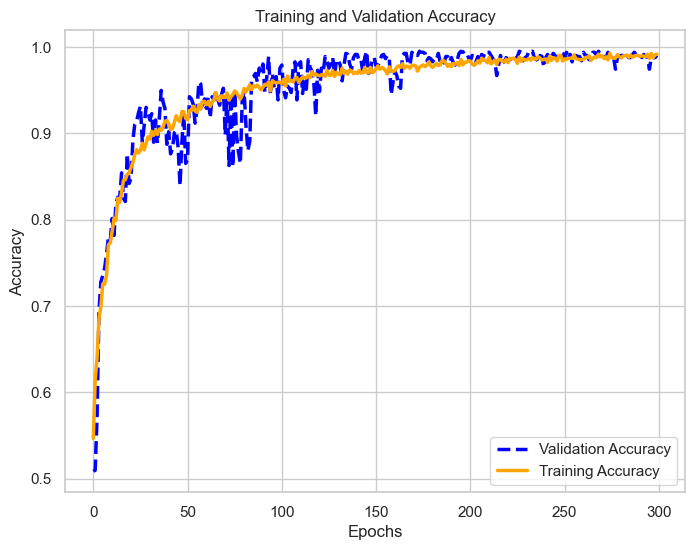

In [93]:
train_acc = d_train_history.history['accuracy']
val_acc = d_train_history.history['val_accuracy']
plot_training_acc(train_acc, val_acc)

In [94]:
# detector.evaluate(x_test_d_c, y_test_d_c)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9876 - loss: 0.0251


[0.031151926144957542, 0.9890109896659851]

In [150]:
# detector.save('detector_coeffs_1910.keras')

In [99]:
detector.load_weights('best_model_detector.keras')

c:\Users\Omar\anaconda3\envs\maestria\lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 98 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [100]:
detector.evaluate(x_test_d_c, y_test_d_c)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9839 - loss: 0.0544


[0.06824277341365814, 0.9816849827766418]

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


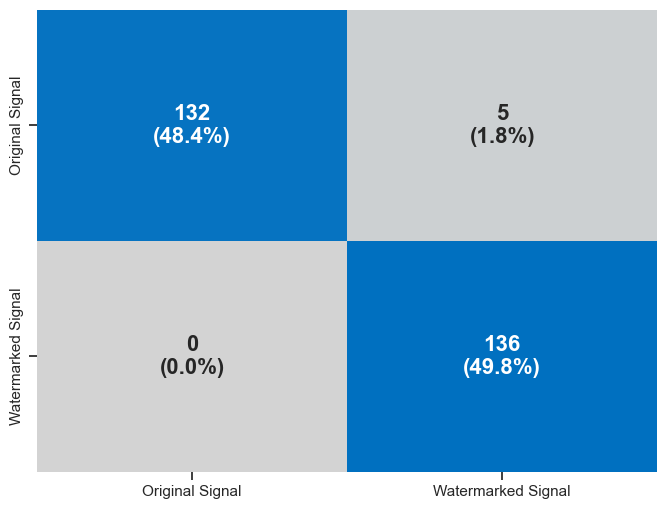

In [101]:
show_confusion_matrix(x_test_d_c, detector, y_test_d_c)

### Muestra de las matrices de confusión por tarea

Resultados de matriz de confusión. Tarea 1

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


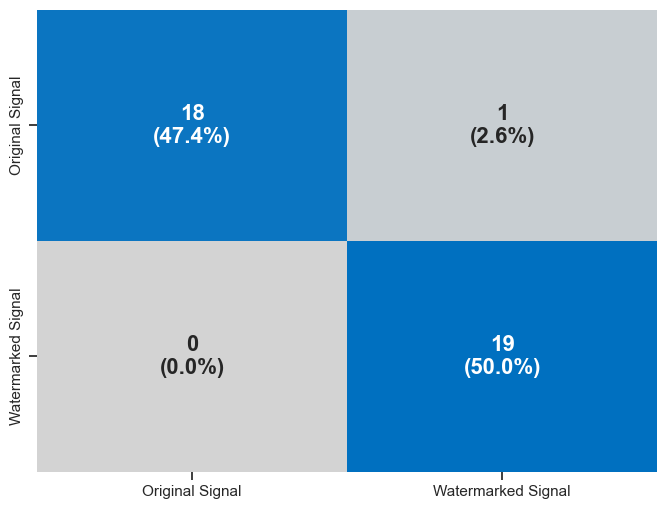

In [102]:
show_confusion_matrix(x_test_d_c[np.where(test_labels==1)], detector, y_test_d_c[np.where(test_labels==1)])

Resultados de matriz de confusión. Tarea 2

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


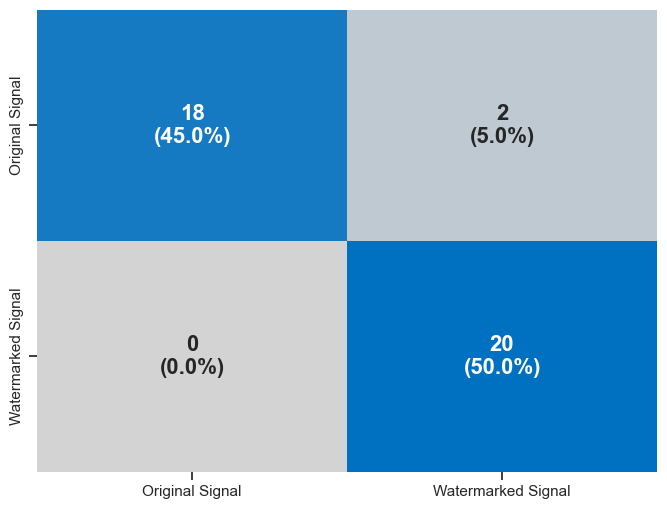

In [103]:
show_confusion_matrix(x_test_d_c[np.where(test_labels==2)], detector, y_test_d_c[np.where(test_labels==2)])

Resultados de matriz de confusión. Tarea 3

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


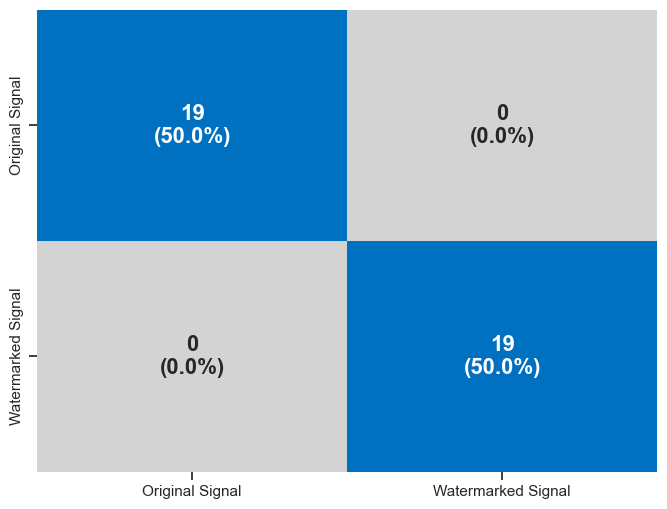

In [104]:
show_confusion_matrix(x_test_d_c[np.where(test_labels==3)], detector, y_test_d_c[np.where(test_labels==3)])

Resultados de matriz de confusión. Tarea 4

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


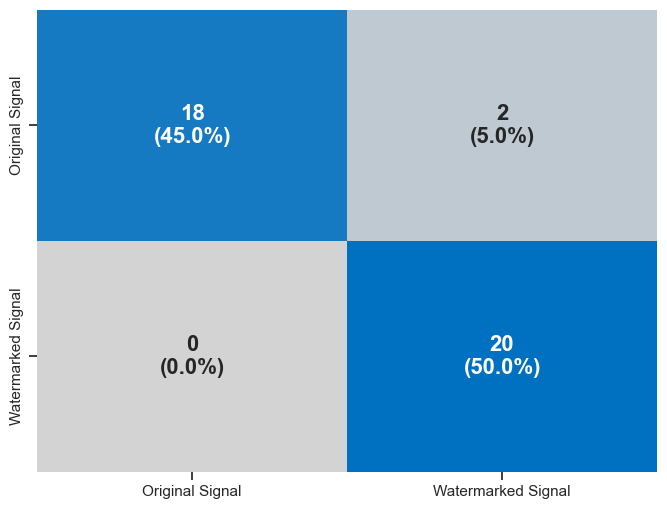

In [105]:
show_confusion_matrix(x_test_d_c[np.where(test_labels==4)], detector, y_test_d_c[np.where(test_labels==4)])

Resultados de matriz de confusión. Tarea 5

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


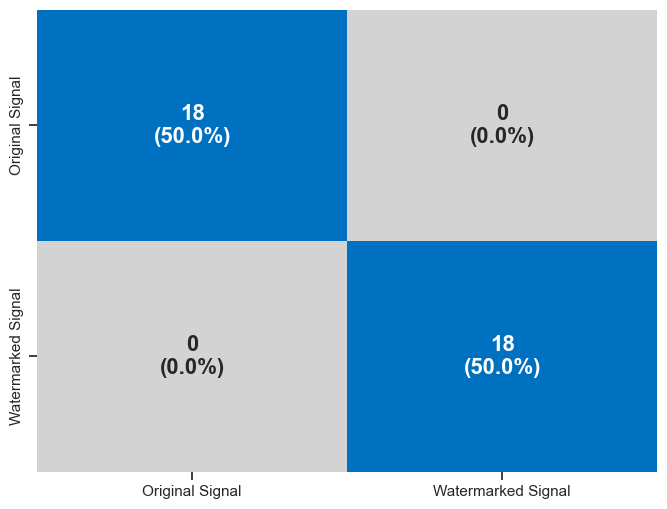

In [106]:
show_confusion_matrix(x_test_d_c[np.where(test_labels==5)], detector, y_test_d_c[np.where(test_labels==5)])

Resultados de matriz de confusión. Tarea 6

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


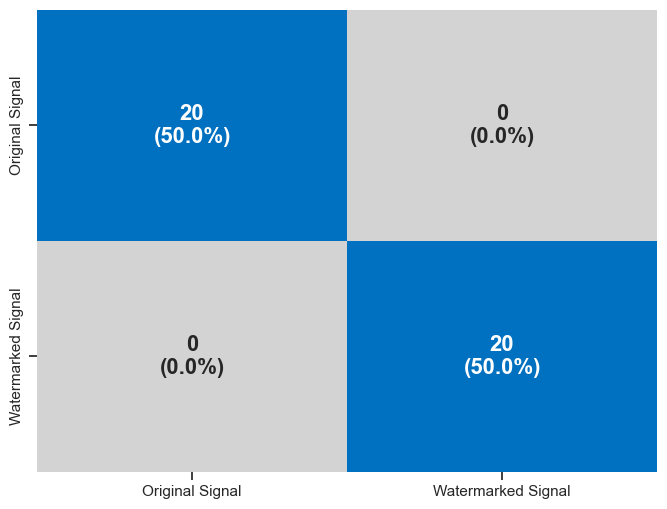

In [107]:
show_confusion_matrix(x_test_d_c[np.where(test_labels==6)], detector, y_test_d_c[np.where(test_labels==6)])

Resultados de matriz de confusión. Tarea 7

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


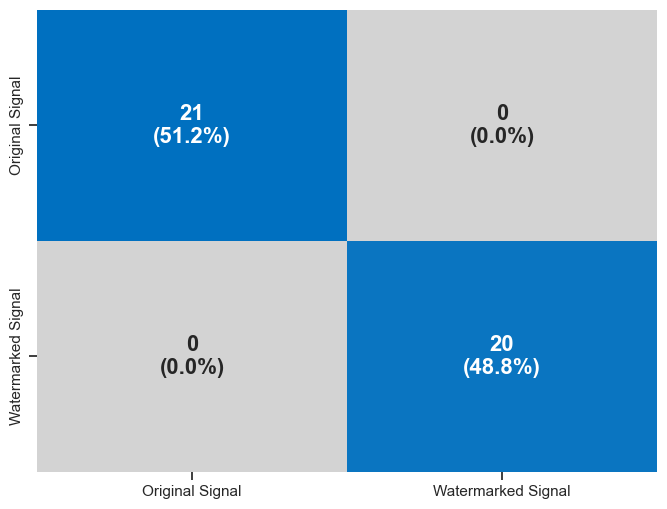

In [108]:
show_confusion_matrix(x_test_d_c[np.where(test_labels==7)], detector, y_test_d_c[np.where(test_labels==7)])